In [1]:
#import libraries

import numpy as np
import pandas as pd
from yaml import safe_load
import os
from tqdm import tqdm
import pickle
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load pickle file

df1= pickle.load(open('Common.pkl','rb'))
df1

,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,innings,outcome_winner,over,first_innings_total,balls_bowled,balls_left
0,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,1,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,7,119
1,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,2,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,8,118
2,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,3,4,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,9,117
3,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,4,0,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,10,116
4,1,Sunrisers Hyderabad,Royal Challengers Bengaluru,5,2,0,Hyderabad,1st innings,Sunrisers Hyderabad,1,207,11,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200640,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,2,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,122,4
200641,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,CJ Jordan,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,123,3
200642,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,1,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,124,2
200643,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,1,0,Bangalore,2nd innings,Sunrisers Hyderabad,20,208,125,1


In [3]:
#delete 1nd inning data

df1 = df1[df1['innings'] == '2nd innings']
df1.drop(columns=['innings'],inplace=True)
df1

C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\2998788376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['innings'],inplace=True)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,outcome_winner,over,first_innings_total,balls_bowled,balls_left
125,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,1,1,0,Hyderabad,Sunrisers Hyderabad,1,207,7,119
126,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,0,0,Hyderabad,Sunrisers Hyderabad,1,207,8,118
127,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,0,Hyderabad,Sunrisers Hyderabad,1,207,9,117
128,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,2,0,Hyderabad,Sunrisers Hyderabad,1,207,10,116
129,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,4,0,Hyderabad,Sunrisers Hyderabad,1,207,11,115
...,...,...,...,...,...,...,...,...,...,...,...,...
200640,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,2,0,Bangalore,Sunrisers Hyderabad,20,208,122,4
200641,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,CJ Jordan,Bangalore,Sunrisers Hyderabad,20,208,123,3
200642,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,1,0,Bangalore,Sunrisers Hyderabad,20,208,124,2
200643,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,1,0,Bangalore,Sunrisers Hyderabad,20,208,125,1


In [4]:
#Calculate the cumulative sum of 'runs' for each 'match_id'

df1['current_score'] = df1.groupby('match_id')['runs'].cumsum()

C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\1433270431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['current_score'] = df1.groupby('match_id')['runs'].cumsum()


In [5]:
#check 'first_innings_total' and 'current_score' are numeric
df1['first_innings_total'] = pd.to_numeric(df1['first_innings_total'], errors='coerce')
df1['current_score'] = pd.to_numeric(df1['current_score'], errors='coerce')

#Calculate 'runs_left' by subtracting 'current_score' from 'total_runs_x'
df1['runs_left'] = df1['first_innings_total'] - df1['current_score']

C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\177570067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['first_innings_total'] = pd.to_numeric(df1['first_innings_total'], errors='coerce')
C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\177570067.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['current_score'] = pd.to_numeric(df1['current_score'], errors='coerce')
C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\177570067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a cop

In [6]:
#Fill NaN values with "0" and convert 'player_dismissed' to integer
df1['player_dismissed'] = df1['player_dismissed'].fillna("0")
df1['player_dismissed'] = df1['player_dismissed'].apply(lambda x: 1 if x != "0" else 0)
df1['player_dismissed'] = df1['player_dismissed'].astype(int)

#Calculate the cumulative sum of 'player_dismissed' for each 'match_id'
df1['wickets'] = df1.groupby('match_id')['player_dismissed'].cumsum()

#Calculate wickets
max_wickets = 10
df1['wickets_left'] = max_wickets - df1['wickets']
df1['wickets_left'] = df1['wickets_left'].clip(lower=0)

print("Intermediate Results:")
print(df1[['match_id', 'player_dismissed', 'wickets', 'wickets_left']])

Intermediate Results:
        match_id  player_dismissed  wickets  wickets_left
125            1                 0        0            10
126            1                 0        0            10
127            1                 0        0            10
128            1                 0        0            10
129            1                 0        0            10
...          ...               ...      ...           ...
200640      1095                 0        6             4
200641      1095                 1        7             3
200642      1095                 0        7             3
200643      1095                 0        7             3
200644      1095                 0        7             3

[96851 rows x 4 columns]


C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\366285512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['player_dismissed'] = df1['player_dismissed'].fillna("0")
C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\366285512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['player_dismissed'] = df1['player_dismissed'].apply(lambda x: 1 if x != "0" else 0)
C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\366285512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [7]:
#Calculate Overs Faced
df1['overs_faced'] = (df1['over'] - 1 ) + (df1['ball'] / 6)

# Calculate Current Run Rate (CRR)
df1['crr'] = df1['current_score'] / df1['overs_faced']
df1


C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\775715944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['overs_faced'] = (df1['over'] - 1 ) + (df1['ball'] / 6)
C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\775715944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['crr'] = df1['current_score'] / df1['overs_faced']


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,outcome_winner,over,first_innings_total,balls_bowled,balls_left,current_score,runs_left,wickets,wickets_left,overs_faced,crr
125,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,1,1,0,Hyderabad,Sunrisers Hyderabad,1,207,7,119,1,206,0,10,0.166667,6.000000
126,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,0,0,Hyderabad,Sunrisers Hyderabad,1,207,8,118,1,206,0,10,0.333333,3.000000
127,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,0,Hyderabad,Sunrisers Hyderabad,1,207,9,117,1,206,0,10,0.500000,2.000000
128,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,2,0,Hyderabad,Sunrisers Hyderabad,1,207,10,116,3,204,0,10,0.666667,4.500000
129,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,4,0,Hyderabad,Sunrisers Hyderabad,1,207,11,115,7,200,0,10,0.833333,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200640,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,2,0,Bangalore,Sunrisers Hyderabad,20,208,122,4,194,14,6,4,19.333333,10.034483
200641,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,1,Bangalore,Sunrisers Hyderabad,20,208,123,3,194,14,7,3,19.500000,9.948718
200642,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,1,0,Bangalore,Sunrisers Hyderabad,20,208,124,2,195,13,7,3,19.666667,9.915254
200643,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,1,0,Bangalore,Sunrisers Hyderabad,20,208,125,1,196,12,7,3,19.833333,9.882353


In [8]:
#Filter the DataFrame to keep only rows where 'balls_left' is not equal to 0

df1 = df1[df1['balls_left'] != 0]

In [9]:
#Calculate Rrequired Run Rate (RRR)

df1['rrr']  = (df1['runs_left']*6)/df1['balls_left']

C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\2559958619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['rrr']  = (df1['runs_left']*6)/df1['balls_left']


In [10]:
#Custom function to determine the result

def result(row):
    return 1 if row['batting_team'] == row['outcome_winner'] else 0

In [11]:
#Apply result function on DataFrame 

df1['result'] = df1.apply(result,axis=1)

C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\3481226059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['result'] = df1.apply(result,axis=1)


In [12]:
#Delete Winner column

df1.drop(columns=['outcome_winner'],inplace=True)
df1

C:\Users\Arth\AppData\Local\Temp\ipykernel_17508\1228388823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['outcome_winner'],inplace=True)


,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,over,first_innings_total,balls_bowled,balls_left,current_score,runs_left,wickets,wickets_left,overs_faced,crr,rrr,result
125,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,1,1,0,Hyderabad,1,207,7,119,1,206,0,10,0.166667,6.000000,10.386555,0
126,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,0,0,Hyderabad,1,207,8,118,1,206,0,10,0.333333,3.000000,10.474576,0
127,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,0,Hyderabad,1,207,9,117,1,206,0,10,0.500000,2.000000,10.564103,0
128,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,2,0,Hyderabad,1,207,10,116,3,204,0,10,0.666667,4.500000,10.551724,0
129,1,Royal Challengers Bengaluru,Sunrisers Hyderabad,5,4,0,Hyderabad,1,207,11,115,7,200,0,10,0.833333,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200639,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,1,1,0,Bangalore,20,208,121,5,192,16,6,4,19.166667,10.017391,19.200000,0
200640,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,2,2,0,Bangalore,20,208,122,4,194,14,6,4,19.333333,10.034483,21.000000,0
200641,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,3,0,1,Bangalore,20,208,123,3,194,14,7,3,19.500000,9.948718,28.000000,0
200642,1095,Royal Challengers Bengaluru,Sunrisers Hyderabad,4,1,0,Bangalore,20,208,124,2,195,13,7,3,19.666667,9.915254,39.000000,0


In [13]:
#Final DataFrame 

final_df = df1[['batting_team','bowling_team','city','runs_left','balls_left', 'wickets_left','first_innings_total','crr','rrr','result']]
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr,result
125,Royal Challengers Bengaluru,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bengaluru,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bengaluru,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bengaluru,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bengaluru,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
200639,Royal Challengers Bengaluru,Sunrisers Hyderabad,Bangalore,16,5,4,208,10.017391,19.200000,0
200640,Royal Challengers Bengaluru,Sunrisers Hyderabad,Bangalore,14,4,4,208,10.034483,21.000000,0
200641,Royal Challengers Bengaluru,Sunrisers Hyderabad,Bangalore,14,3,3,208,9.948718,28.000000,0
200642,Royal Challengers Bengaluru,Sunrisers Hyderabad,Bangalore,13,2,3,208,9.915254,39.000000,0


In [14]:
#shuffle data

final_df = final_df.sample(final_df.shape[0])
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr,result
151056,Mumbai Indians,Punjab Kings,Chandigarh,39,17,6,168,7.514563,13.764706,1
96810,Lucknow Super Giants,Mumbai Indians,Lucknow,10,9,4,144,7.243243,6.666667,1
149529,Kolkata Knight Riders,Punjab Kings,Chandigarh,106,103,10,124,6.352941,6.174757,1
70967,Lucknow Super Giants,Chennai Super Kings,Chennai,138,88,10,217,14.812500,9.409091,0
195404,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,9,19,7,142,7.900990,2.842105,1
...,...,...,...,...,...,...,...,...,...,...
183734,Kolkata Knight Riders,Chennai Super Kings,Kolkata,122,79,9,165,6.292683,9.265823,1
185020,Kolkata Knight Riders,Punjab Kings,Pune,11,22,5,155,8.816327,3.000000,1
10709,Punjab Kings,Kolkata Knight Riders,Kolkata,83,65,10,191,11.781818,7.661538,1
3955,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,104,49,7,209,8.873239,12.734694,0


In [15]:
#check nall values 

final_df.isnull().sum()

batting_team           0
bowling_team           0
city                   0
runs_left              0
balls_left             0
wickets_left           0
first_innings_total    0
crr                    0
rrr                    0
result                 0
dtype: int64

In [16]:
#check statistics of data

final_df.describe()

,runs_left,balls_left,wickets_left,first_innings_total,crr,rrr,result
count,96422.000000,96422.000000,96422.000000,96422.00000,96422.000000,96422.000000,96422.000000
mean,94.612713,63.057103,7.524382,169.60508,7.685097,10.729619,0.515505
std,51.222112,33.218690,2.161556,31.18160,2.413103,13.083168,0.499762
min,-16.000000,1.000000,0.000000,67.00000,0.000000,-36.000000,0.000000
25%,54.000000,35.000000,6.000000,150.00000,6.461538,7.230769,0.000000
50%,94.000000,64.000000,8.000000,169.00000,7.714286,9.041096,1.000000
75%,133.000000,92.000000,9.000000,189.00000,8.957440,11.239437,1.000000
max,286.000000,119.000000,10.000000,287.00000,132.000000,708.000000,1.000000


In [17]:
#remove target variable 

X = final_df.drop('result', axis=1)  
y = final_df['result']             

In [18]:
#split data into train and test data

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#check the shape of split data

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((77137, 9), (19285, 9), (77137,), (19285,))

In [20]:
#convert non-numerical columns with help of OneHotEncoding 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], 
    remainder='passthrough')

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc


In [22]:
#Define the model

pipe_logreg = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',LogisticRegression(random_state=42))
])

#Train the model
pipe_logreg.fit(X_train, y_train)

#Make predictions
y_pred_logreg = pipe_logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("-" * 60)
cm_lr= confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix:\n", cm_lr)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Results:
Accuracy: 0.8072595281306715
------------------------------------------------------------
Confusion Matrix:
 [[7328 1923]
 [1794 8240]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      9251
           1       0.81      0.82      0.82     10034

    accuracy                           0.81     19285
   macro avg       0.81      0.81      0.81     19285
weighted avg       0.81      0.81      0.81     19285



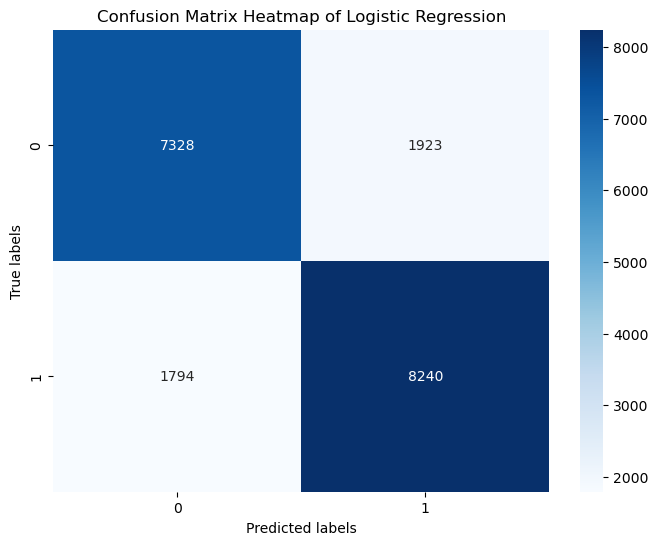

In [23]:
#Create a heatmap for the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of Logistic Regression')
plt.show()

In [24]:
#Hyperparameter for Logistic Regression

param_grid_logreg = {
    'step3__C': [0.01, 0.1, 1, 10, 100]     
}

#Grid SearchCV 
grid_search_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5, scoring='accuracy')
grid_search_logreg.fit(X_train, y_train)

print("Best Parameters: ", grid_search_logreg.best_params_)
print("Best Score: ", grid_search_logreg.best_score_)

Best Parameters:  {'step3__C': 0.1}
Best Score:  0.8033369542797588


In [25]:
# Get the best estimator (the trained model with the best hyperparameters)
best_logreg = grid_search_logreg.best_estimator_

#Evaluate the best model
y_pred_best_logreg = best_logreg.predict(X_test)

print("Best Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_logreg))
print("-" * 60)
cm_lr_cv = confusion_matrix(y_test, y_pred_best_logreg)
print("Confusion Matrix:\n", cm_lr_cv)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_best_logreg))

Best Model Results:
Accuracy: 0.8074669432201192
------------------------------------------------------------
Confusion Matrix:
 [[7330 1921]
 [1792 8242]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.79      0.80      9251
           1       0.81      0.82      0.82     10034

    accuracy                           0.81     19285
   macro avg       0.81      0.81      0.81     19285
weighted avg       0.81      0.81      0.81     19285



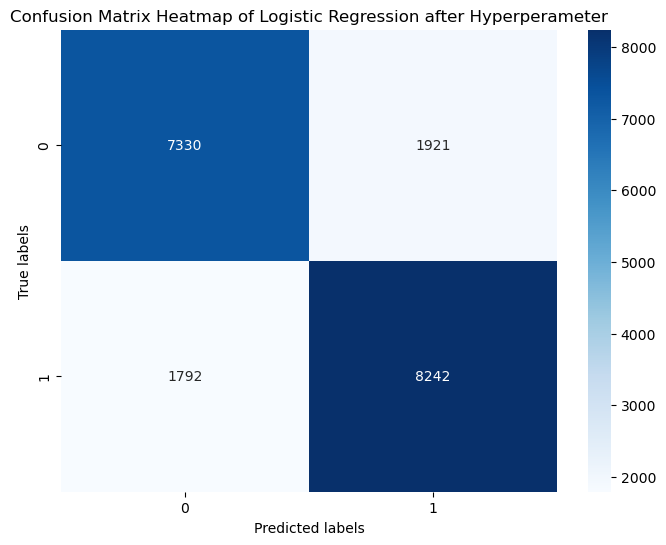

In [26]:
#Create a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_lr_cv, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of Logistic Regression after Hyperperameter')
plt.show()

## Naive Bayes

In [27]:
pipe_nb = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',GaussianNB())
])

#Train the model
pipe_nb.fit(X_train, y_train)

#Make predictions
y_pred_nb = pipe_nb.predict(X_test)

#Evaluate the model
print("Naive Bayes Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("-" * 60)
cm_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix:\n", cm_nb)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Results:
Accuracy: 0.6971221156339124
------------------------------------------------------------
Confusion Matrix:
 [[5422 3829]
 [2012 8022]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65      9251
           1       0.68      0.80      0.73     10034

    accuracy                           0.70     19285
   macro avg       0.70      0.69      0.69     19285
weighted avg       0.70      0.70      0.69     19285



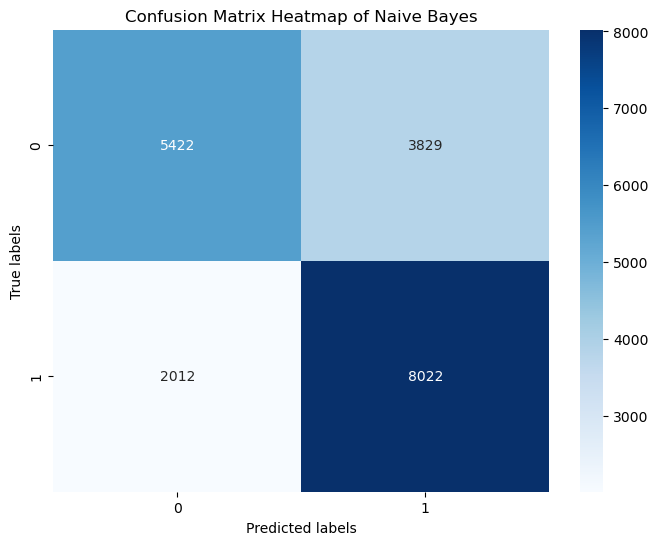

In [28]:
#Create a heatmap for the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of Naive Bayes')
plt.show()

In [29]:
#Hyperparameter grid for Naive Bayes

param_grid_nb = {
    'step3__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

#Grid search
grid_search_nb = GridSearchCV(pipe_nb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

print("Best Parameters: ", grid_search_nb.best_params_)
print("Best Cross-validated Score: ", grid_search_nb.best_score_)

Best Parameters:  {'step3__var_smoothing': 1e-09}
Best Cross-validated Score:  0.6938694191125435


In [30]:
# Get the best estimator
best_nb = grid_search_nb.best_estimator_

#Evaluate the best model
y_pred_best_nb = best_nb.predict(X_test)

print("Best Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_nb))
print("-" * 60)
cm_nb_cv = confusion_matrix(y_test, y_pred_best_nb)
print("Confusion Matrix:\n", cm_nb_cv)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_best_nb))

Best Model Results:
Accuracy: 0.6971221156339124
------------------------------------------------------------
Confusion Matrix:
 [[5422 3829]
 [2012 8022]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.59      0.65      9251
           1       0.68      0.80      0.73     10034

    accuracy                           0.70     19285
   macro avg       0.70      0.69      0.69     19285
weighted avg       0.70      0.70      0.69     19285



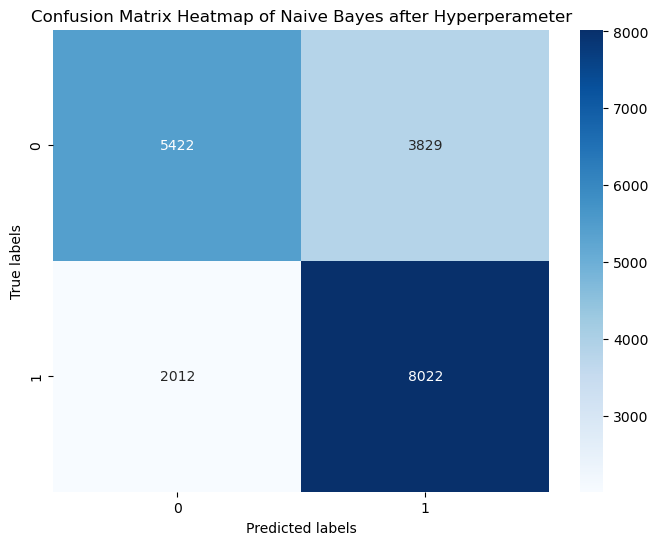

In [31]:
#Create a heatmap for the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_nb_cv, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of Naive Bayes after Hyperperameter')
plt.show()

 ## GradientBoosting

In [32]:
pipe_gb = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',GradientBoostingClassifier(random_state=42))
])

#Train the model
pipe_gb.fit(X_train, y_train)

#Make predictions
y_pred_gb = pipe_gb.predict(X_test)

#Evaluate the model
print("Gradient Boosting Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("-" * 60)
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Confusion Matrix:\n",cm_gb)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Results:
Accuracy: 0.8437645838734767
------------------------------------------------------------
Confusion Matrix:
 [[7719 1532]
 [1481 8553]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      9251
           1       0.85      0.85      0.85     10034

    accuracy                           0.84     19285
   macro avg       0.84      0.84      0.84     19285
weighted avg       0.84      0.84      0.84     19285



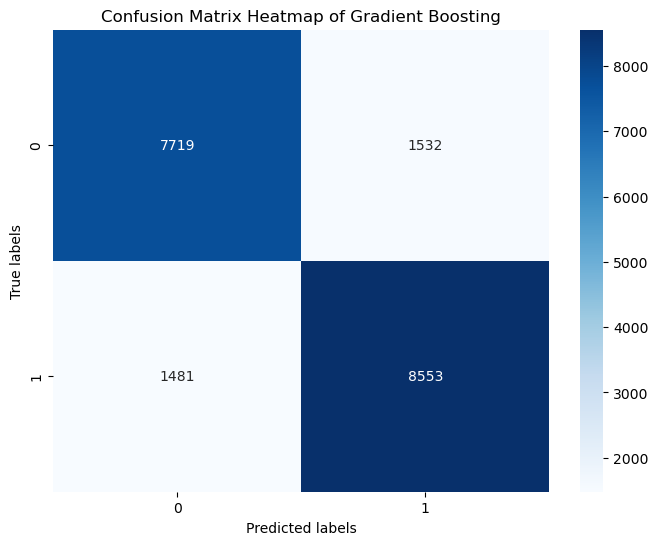

In [33]:
#Create a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_gb, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of Gradient Boosting')
plt.show()

In [34]:
#Hyperparameter grid for Gradient Boosting

param_grid_gb = {
    'step3__n_estimators': [50, 100, 200],
    'step3__learning_rate': [0.01, 0.1, 1],
    'step3__max_depth': [3, 4, 5]
}

#Grid Search
grid_search_gb = GridSearchCV(pipe_gb, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

print("Best Parameters: ", grid_search_gb.best_params_)
print("Best Score: ", grid_search_gb.best_score_)

Best Parameters:  {'step3__learning_rate': 0.1, 'step3__max_depth': 4, 'step3__n_estimators': 200}
Best Score:  0.9319003982374422


In [35]:
# Get the best estimator (the trained model with the best hyperparameters)
best_gb = grid_search_gb.best_estimator_

# Evaluate the best model
y_pred_best_gb = best_gb.predict(X_test)

print("Best Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_gb))
print("-" * 60)
cm_gb_cv = confusion_matrix(y_test, y_pred_best_gb)
print("Confusion Matrix:\n", cm_gb_cv)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_best_gb))

Best Model Results:
Accuracy: 0.9293233082706767
------------------------------------------------------------
Confusion Matrix:
 [[8513  738]
 [ 625 9409]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      9251
           1       0.93      0.94      0.93     10034

    accuracy                           0.93     19285
   macro avg       0.93      0.93      0.93     19285
weighted avg       0.93      0.93      0.93     19285



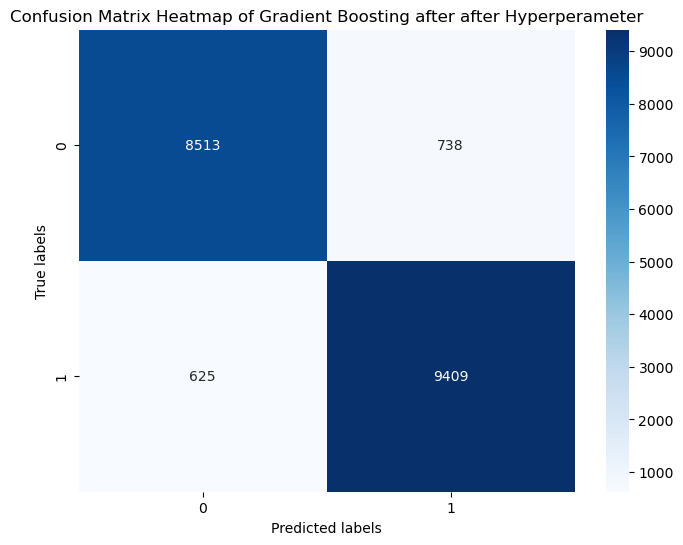

In [44]:
#Create a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_gb_cv, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of Gradient Boosting after after Hyperperameter')
plt.show()

## SVM

In [37]:
pipe_svm = Pipeline(steps=[
    ('step1',trf),
    ('step2',StandardScaler()),
    ('step3',SVC(kernel='linear', random_state=42))
])

#Train the model
pipe_svm.fit(X_train, y_train)

#Make predictions
y_pred_svm = pipe_svm.predict(X_test)

#Evaluate the model
print("SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("-" * 60)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

SVM Results:
Accuracy: 0.809385532797511
------------------------------------------------------------
Confusion Matrix:
 [[7263 1988]
 [1688 8346]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      9251
           1       0.81      0.83      0.82     10034

    accuracy                           0.81     19285
   macro avg       0.81      0.81      0.81     19285
weighted avg       0.81      0.81      0.81     19285



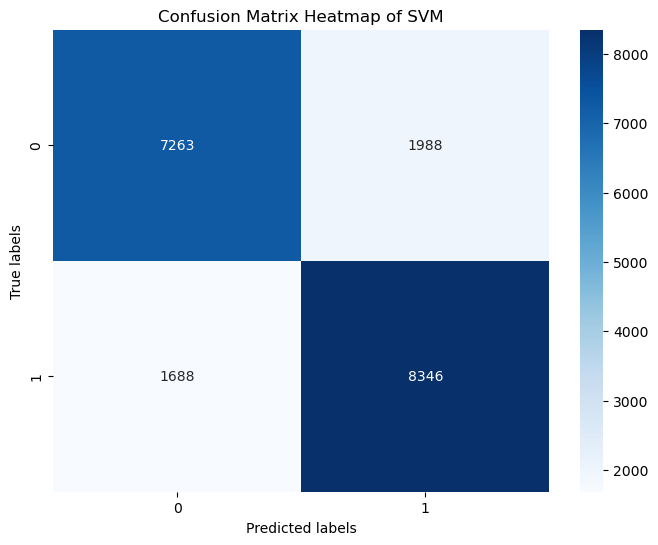

In [38]:
#Create a heatmap for the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of SVM')
plt.show()

In [39]:
#Hyperparameter grid for SVM

param_grid_svm = {
    'step3__C': [0.1, 1, 10],
    'step3__gamma': [0.1, 0.01, 0.001],
    'step3__kernel': ['rbf']
}

#Grid Search
grid_search_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

print("Best Parameters: ", grid_search_svm.best_params_)
print("Best Score: ", grid_search_svm.best_score_)

Best Parameters:  {'step3__C': 10, 'step3__gamma': 0.001, 'step3__kernel': 'rbf'}
Best Score:  0.8802131683473375


In [40]:
# Get the best estimator (the trained model with the best hyperparameters)
best_svm = grid_search_svm.best_estimator_

#Evaluate the best model
y_pred_best_svm = best_svm.predict(X_test)

print("Best Model Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_svm))
print("-" * 60)
cm_svm_cv = confusion_matrix(y_test, y_pred_best_svm)
print("Confusion Matrix:\n", cm_svm_cv)
print("-" * 60)
print("Classification Report:\n", classification_report(y_test, y_pred_best_svm))

Best Model Results:
Accuracy: 0.8855587243971998
------------------------------------------------------------
Confusion Matrix:
 [[8103 1148]
 [1059 8975]]
------------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88      9251
           1       0.89      0.89      0.89     10034

    accuracy                           0.89     19285
   macro avg       0.89      0.89      0.89     19285
weighted avg       0.89      0.89      0.89     19285



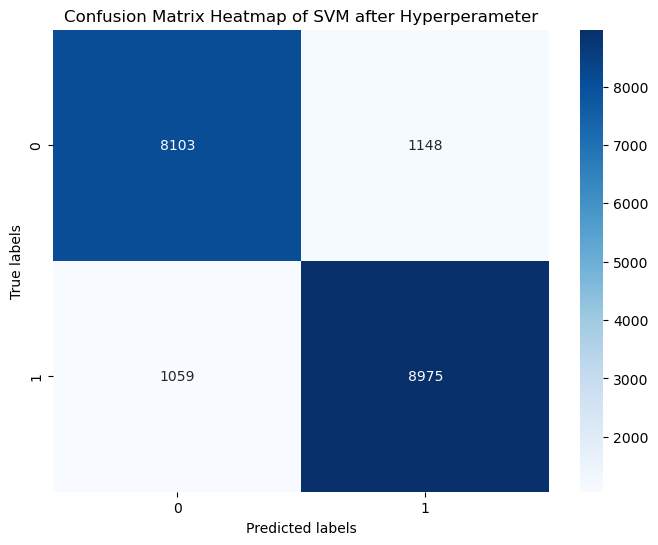

In [41]:
#Create a heatmap for the confusion matrix

plt.figure(figsize=(8,6))
sns.heatmap(cm_svm_cv, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap of SVM after Hyperperameter')
plt.show()

In [45]:
#download final model
#pickle.dump(best_gb,open('GradientBoosting_for_Winning.pkl','wb'))

In [22]:
# pipe_logreg = Pipeline(steps=[
#     ('step1',trf),
#     ('step2',StandardScaler()),
#     ('step3',LogisticRegression(random_state=42))
# ])

# #Train the model
# pipe_logreg.fit(X_train, y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', StandardScaler()),
                ('step3', LogisticRegression(random_state=42))])

In [27]:
# Extract feature names from ColumnTransformer
ohe_feature_names = pipe_logreg.named_steps['step1'].named_transformers_['trf'].get_feature_names_out(['batting_team', 'bowling_team', 'city'])
numerical_features = ['runs_left', 'balls_left', 'wickets_left', 'first_innings_total', 'crr', 'rrr']

# Combine feature names
all_feature_names = list(ohe_feature_names) + numerical_features

# Extract coefficients from the model
coefficients = pipe_logreg.named_steps['step3'].coef_[0]

# Ensure lengths match
assert len(all_feature_names) == len(coefficients), "Feature names and coefficients length mismatch!"

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': np.abs(coefficients)  # Using absolute value for magnitude
})

# Sort by 'Importance'
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [28]:
# Define categories
city_features = [name for name in all_feature_names if name.startswith('city_')]
batting_team_features = [name for name in all_feature_names if name.startswith('batting_team_')]
bowling_team_features = [name for name in all_feature_names if name.startswith('bowling_team_')]

# Compute average importance for each category
def average_importance(category_features):
    return feature_importance_df[feature_importance_df['Feature'].isin(category_features)]['Importance'].mean()

# Calculate average importances for categorical features
avg_city_importance = average_importance(city_features)
avg_batting_team_importance = average_importance(batting_team_features)
avg_bowling_team_importance = average_importance(bowling_team_features)

# Individual importances for numerical features
numerical_importances = feature_importance_df[feature_importance_df['Feature'].isin(numerical_features)]

# Prepare data for visualization
avg_importances = {
    'City Features': avg_city_importance,
    'Batting Team Features': avg_batting_team_importance,
    'Bowling Team Features': avg_bowling_team_importance
}

# Combine the average importances and numerical features importances
combined_importances = {**avg_importances, **dict(zip(numerical_importances['Feature'], numerical_importances['Importance']))}

# Create a DataFrame for plotting
combined_df = pd.DataFrame(list(combined_importances.items()), columns=['Feature', 'Importance'])


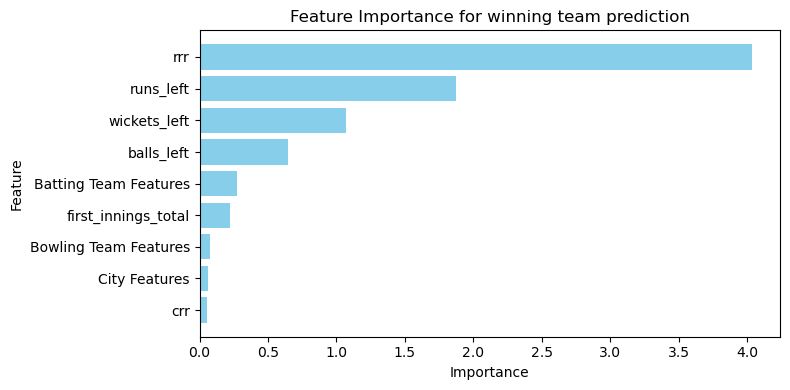

In [31]:
# Sort by 'Importance' in ascending order
combined_df = combined_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 4))
plt.barh(combined_df['Feature'], combined_df['Importance'], color='skyblue')
plt.title('Feature Importance for winning team prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()